In [11]:
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

covid_df= pd.read_csv('data/covid_df.csv', sep=',')



In [12]:
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
cropped_covid_df = covid_df[covid_df['country'].isin(countries)]
cropped_covid_df['date'] = pd.to_datetime(cropped_covid_df['date'], dayfirst=True)

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)

cropped_covid_df = cropped_covid_df.merge(populations, on=['country'])
cropped_covid_df['daily_confirmed_per_hundred'] = cropped_covid_df['daily_confirmed']/cropped_covid_df['population'] * 100
cropped_covid_df.head()

C:\Users\tep-n\AppData\Local\Temp\ipykernel_10776\1852589196.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cropped_covid_df['date'] = pd.to_datetime(cropped_covid_df['date'], dayfirst=True)


,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate,population,daily_confirmed_per_hundred
0,2020-01-23,Australia,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25726900,NaN
1,2020-01-25,Australia,4.0,0.0,0.0,4.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000016
2,2020-01-26,Australia,4.0,0.0,0.0,4.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000
3,2020-01-27,Australia,5.0,0.0,0.0,5.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000004
4,2020-01-28,Australia,5.0,0.0,0.0,5.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000


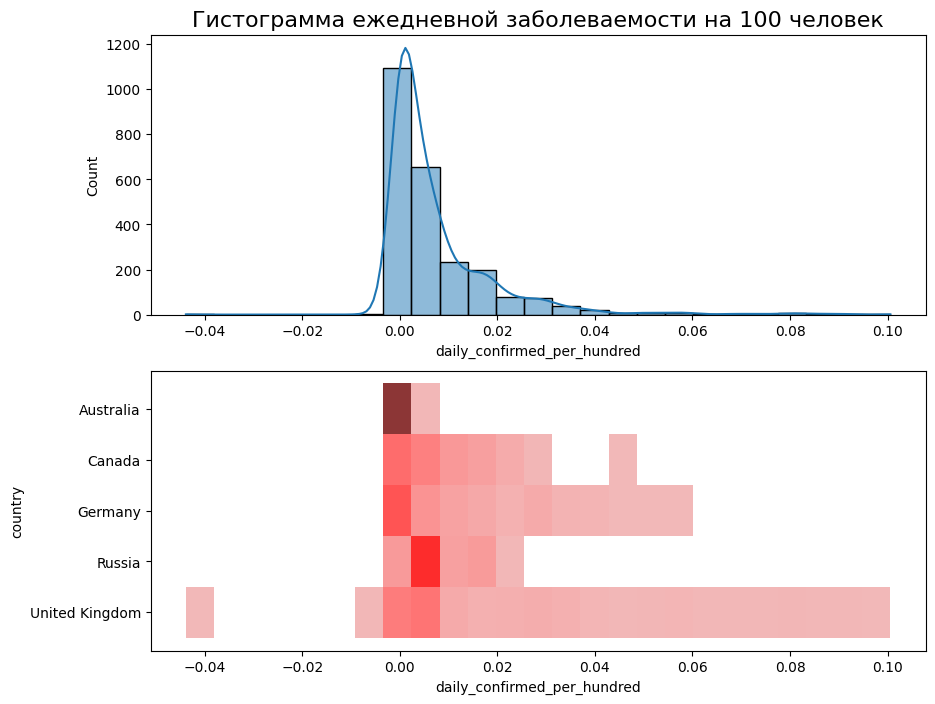

In [13]:
fig, axes = plt.subplots(nrows= 2, ncols = 1, figsize=(10, 8))
sns.histplot(
    data=cropped_covid_df,
    x='daily_confirmed_per_hundred',
    bins=25,
    kde=True,
    ax=axes[0]
);
axes[0].set_title('Гистограмма ежедневной заболеваемости на 100 человек', fontsize=16)
sns.histplot(
    data=cropped_covid_df,
    x='daily_confirmed_per_hundred',
    y='country',
    bins=25,
    color='red',
    ax=axes[1]
);


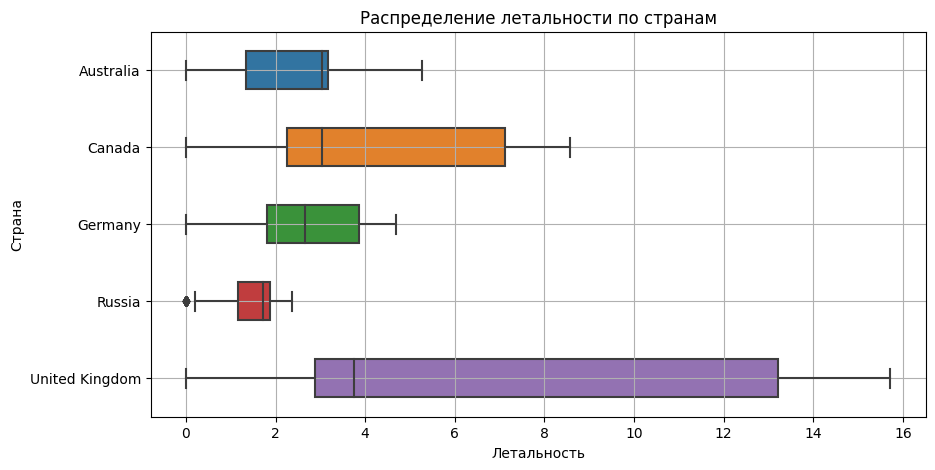

In [14]:
fig = plt.figure(figsize=(10, 5))
boxplot = sns.boxplot(
    data=cropped_covid_df,
    y='country',
    x='death_rate',
    orient='h',
    width=0.5
)

boxplot.set_title('Распределение летальности по странам')
boxplot.set_xlabel('Летальность')
boxplot.set_ylabel('Страна')
boxplot.grid();

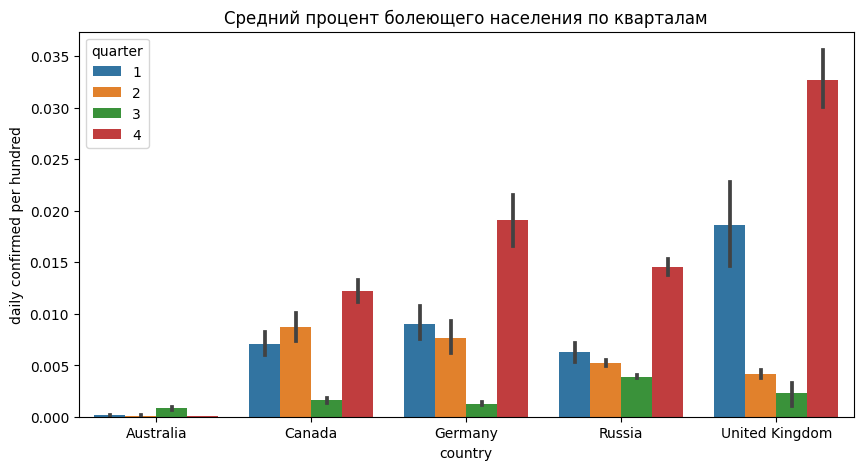

In [15]:
fig = plt.figure(figsize=(10,5))
cropped_covid_df['quarter'] = cropped_covid_df['date'].dt.quarter
barplot = sns.barplot(
    data=cropped_covid_df,
    x='country',
    y='daily_confirmed_per_hundred',
    hue='quarter'
)
barplot.set_title('Средний процент болеющего населения по кварталам')
barplot.set_ylabel('daily confirmed per hundred');

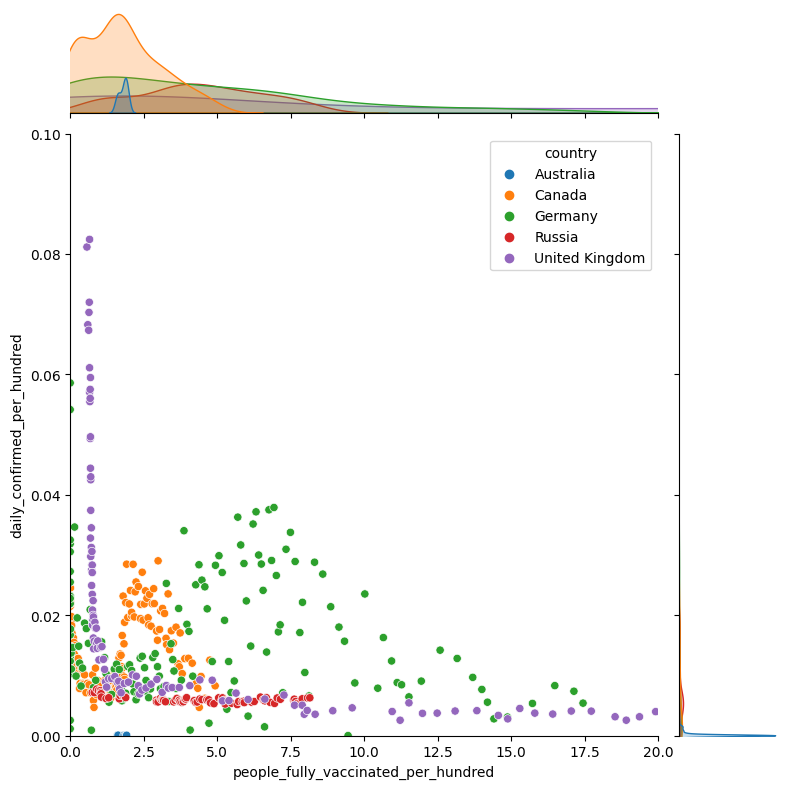

In [16]:
jointplot = sns.jointplot(
    data=cropped_covid_df,
    x='people_fully_vaccinated_per_hundred',
    y='daily_confirmed_per_hundred',
    hue='country',
    xlim=(0, 20),
    ylim=(0, 0.1),
    height=8
)

In [17]:
pivot = cropped_covid_df.pivot_table(
    values='people_vaccinated_per_hundred',
    columns='date',
    index='country'
)
pivot.columns = pivot.columns.astype('string')
pivot

date,2020-12-13,2020-12-14,2020-12-15,2020-12-16,2020-12-17,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,...,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29
country,,,,,,,,,,,,,,,,,,,,,
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.40,12.69,12.88,13.28,13.73,14.18
Canada,NaN,0.0,0.00,0.01,0.02,0.03,0.03,0.03,0.05,0.07,...,48.10,49.25,50.14,50.89,51.77,52.39,53.05,53.95,54.99,55.71
Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.18,39.68,39.95,40.11,40.29,40.64,41.29,41.87,42.40,42.61
Russia,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,0.04,...,10.20,10.30,10.50,10.53,10.70,10.81,11.07,11.12,11.19,11.29
United Kingdom,0.13,NaN,NaN,NaN,NaN,NaN,NaN,0.99,NaN,NaN,...,55.01,55.33,55.63,55.82,55.99,56.27,56.61,56.99,57.29,57.56


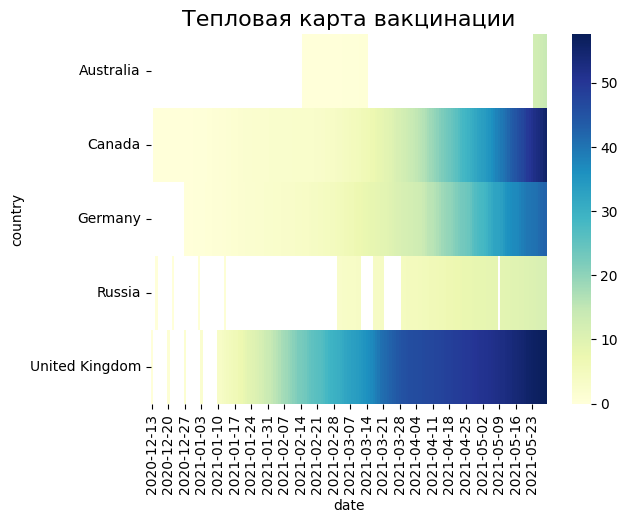

In [18]:
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта вакцинации', fontsize=16);

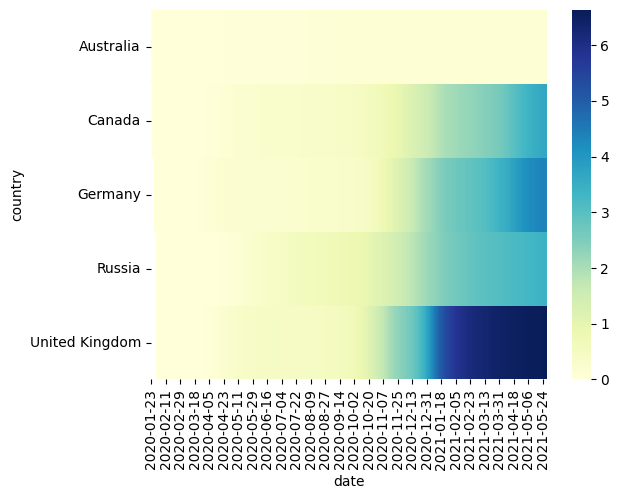

In [19]:
cropped_covid_df['confirmed_per_hundred'] = (cropped_covid_df['confirmed'] / cropped_covid_df['population']) * 100
#heatmap = sns.heatmap(data=cropped_covid_df['confirmed_per_hundred'], cmap='YlGnBu')
cropped_covid_df['confirmed_per_hundred']
pivot = cropped_covid_df.pivot_table(
    values='confirmed_per_hundred',
    columns='date',
    index='country'
)
pivot.columns = pivot.columns.astype('string')
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')


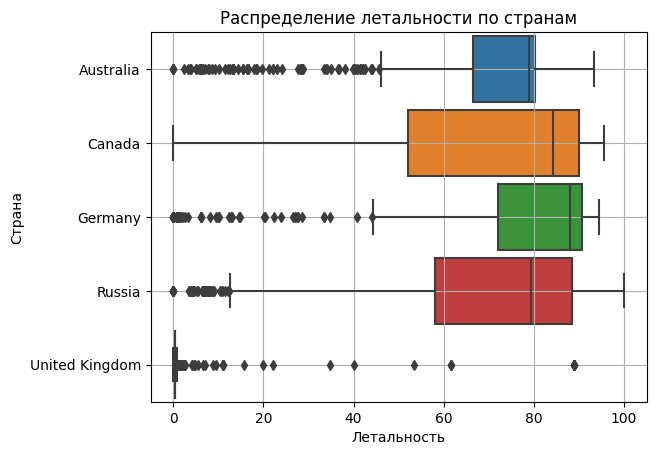

In [21]:


boxplot = sns.boxplot(
    data=cropped_covid_df,
    y='country',
    x='recover_rate',
    orient='h',
    width=0.9
)


boxplot.set_title('Распределение летальности по странам')
boxplot.set_xlabel('Летальность')
boxplot.set_ylabel('Страна')
boxplot.grid();